# Introduction to probability: exercises

This notebook contains exercises that build on the first lecture on probability.

## Exercise: A bag with *n* balls

A bag has 20 balls, 15 blue and 5 red. A person randomly gets two balls from the bag without looking (one ball in left and one in right hand) and writes down the colors.

1) What is one possible outcome?
2) What is the sample space?
3) If the event is that the ball in the right hand is blue, what possible outcomes correspond to that?
4) Write a function the will simulate this experiment and estimate the probability that the ball in the right hand is blue.

In [ ]:
# 1. Possible outcome:
possible_outcome = None
# 2. Sample space:
sample_space = None
# 3. Possible outcomes for the event:
outcomes_for_event = None

# 4. Simulation to estimate the event probability:
def estimate_probability_of_event3():
    pass

estimate_probability_of_event3()


## Exercise: DNA example

A DNA sequence is generated with four nucleotides (A, C, G, T) with equal probabilities. What is the probability of observing the word GATAAG or a single nucleotide substitution of it (e.g., GAGAAG) at any position?

What are possible outcomes? What is the sample space? What is the event of interest?

Write a function that simulates this experiment and computes the probability of the given word.

In [ ]:
def compute_sequence_probability(sequence: str):
    pass

compute_sequence_probability("GATAAG")

## Exercise: Rolling dice

In the experiment with two rolls of a die, the sum of the two rolls is 9. How likely is it that the first roll was 6?

Write a function that simulates this experiment and computes the desired conditional probability. The sum of the rolls and the condition of the value for the first roll should be input arguments for the function.

Write a function that simulates the experiment of rolling two dice and plots the probability distribution of the sum of the two rolls.

In [ ]:

def estimate_probability(num_experiments: int = 1000, roll_sum: int = 9, first_roll: int = 6):
    pass


def estimate_probability_distribution(num_experiments: int = 1000):
    pass

estimate_probability()
estimate_probability_distribution()

## Exercise: Disease test 

A test for a disease is correct 95% of the time: if the person has a disease, the test results are positive with probability 0.95, and if the person doesn't have the disease, the test results are negative with probability 0.95. A random person tested for a disease has probability of 0.001 of having a disease. If a person test positive, what is the probability of having the disease?

Write a function that simulates this problem and estimates the joint probability distribution of the disease status and the test result. Use the simulation to compute:
- the probability of having disease if the test is positive,
- the probability of not having disease if the test is negative,
- the probability of having disease if the test is negative,
- the probability of not having disease if the test is positive.

In [ ]:
def estimate_disease_and_test_probability(num_experiments: int = 10000, disease_prob: float = 0.001, test_correct_prob: float = 0.95):
    pass

estimate_disease_and_test_probability()

## Exercise: The Monty Hall problem

A contestant on a game show is told that a prize is equally likely to be found behind one of the three closed doors in front of them. The contestant picks a door. The speaker on the show opens one of the remaining two doors after making sure that the prize is not behind it. The contestant can now either choose to stay with the initial choice of the door or switch to the other unopened door. The contestant wins the prize if it is behind the final choice of the door. What is the probability of winning if the contestant sticks to the initial choice? What if they always switch to the unopened door?

Write a function that will simulate this show and compare the probabilities of winning. What is the winning strategy?

## Solutions

## Exercise: A bag with *n* balls

In [ ]:
# 1. Possible outcome:
possible_outcome = ('blue', 'blue') # picked up blue balls with both hands
# 2. Sample space:
sample_space = {('blue', 'blue'), ('blue', 'red'), ('red', 'blue'), ('red', 'red')} # all possible outcomes
# 3. Possible outcomes for the event:
outcomes_for_event = {('blue', 'blue'), ('red', 'blue')}

# 4. Simulation to estimate the event probability:
import random

def get_two_balls():
    bag = ['blue'] * 15 + ['red'] * 5
    return random.sample(bag, 2)

def estimate_probability_of_event3(num_experiments: int = 1000):
    event_count = 0
    for _ in range(num_experiments):
        outcome = get_two_balls()
        if outcome[1] == 'blue':
            event_count += 1

    return event_count / num_experiments

estimate_probability_of_event3()


## Exercise: DNA example

In [ ]:
# outcomes: all possible sequences of length 6 with letters A, C, G, T, e.g., GATAAG, ACGTTA, etc.
# sample space: 4^6 possible sequences - all combinations of length 6 with letters A, C, G, T
# event of interest: all sequences that differ from GATAAG by at most one nucleotide

import random

def get_nucleotide():
    return random.choice(['A', 'C', 'G', 'T'])

def compute_sequence_probability(sequence: str, num_experiments: int):
    event_count = 0

    for _ in range(num_experiments):
        outcome = [get_nucleotide() for _ in range(len(sequence))]
        event_happened = sum(letter1 != letter2 for letter1, letter2 in zip(outcome, sequence)) <= 1
        event_count += event_happened

    return event_count / num_experiments

compute_sequence_probability("GATAAG", 10000)

## Exercise: Rolling dice

In [ ]:
import random

def run_experiment():
    return [random.choice(list(range(1,7))) for _ in range(2)]

def estimate_probability(num_experiments: int = 1000, roll_sum: int = 9, first_roll: int = 6):
    conditioning_event_count = 0
    conditional_event_count = 0

    for _ in range(num_experiments):
        rolls = run_experiment()
        conditioning_event_happened = sum(rolls) == roll_sum
        if conditioning_event_happened:
            conditioning_event_count += 1
            conditional_event_happened = rolls[0] == first_roll
            if conditional_event_happened:
                conditional_event_count += 1

    return conditional_event_count / conditioning_event_count


def estimate_probability_distribution(num_experiments: int = 1000):
    from collections import defaultdict
    import plotly.express as px

    sum_counts = defaultdict(int)

    for _ in range(num_experiments):
        rolls = run_experiment()
        roll_sum = sum(rolls)
        sum_counts[roll_sum] += 1

    prob_dist = {roll_sum: count / num_experiments for roll_sum, count in sum_counts.items()}

    fig = px.bar(x=prob_dist.keys(), y=prob_dist.values(),
                 labels={'x': 'Sum of two rolls', 'y': 'Probability'},
                 title='Probability distribution of the sum of two rolls')
    fig.show()
    return prob_dist

estimate_probability()
estimate_probability_distribution()

## Exercise: Disease test

{'disease': {'negative_test': 0.0, 'positive_test': 0.001},
 'no_disease': {'negative_test': 0.951, 'positive_test': 0.048}}


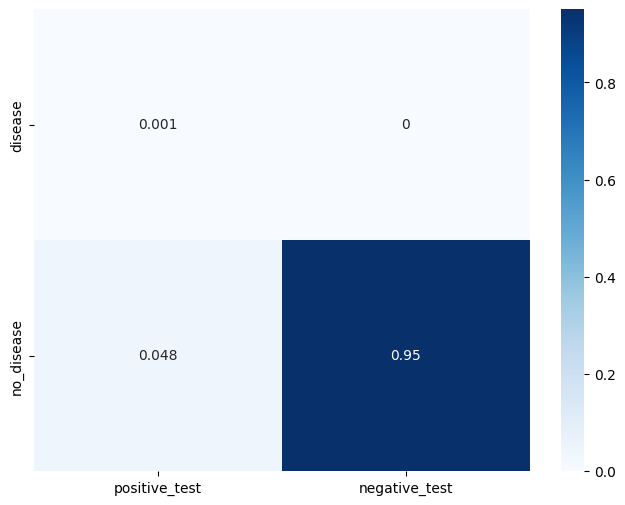

In [18]:
from pprint import pprint

def estimate_disease_and_test_probability(num_experiments: int = 1000, disease_prob: float = 0.001, test_correct_prob: float = 0.95):
    event_counts = {
        'disease': {'positive_test': 0, 'negative_test': 0},
        'no_disease': {'positive_test': 0, 'negative_test': 0}
    }
    for _ in range(num_experiments):
        has_disease = random.random() < disease_prob

        if has_disease:
            test_positive = random.random() < test_correct_prob
            if test_positive:
                event_counts['disease']['positive_test'] += 1
            else:
                event_counts['disease']['negative_test'] += 1
        else:
            test_positive = random.random() < (1 - test_correct_prob)
            if test_positive:
                event_counts['no_disease']['positive_test'] += 1
            else:
                event_counts['no_disease']['negative_test'] += 1

    prob_dist = {event_disease: {event_test: event_count / num_experiments
                                 for event_test, event_count in test_info.items()}
                 for event_disease, test_info in event_counts.items()}

    return prob_dist

prob_dist = estimate_disease_and_test_probability()
pprint(prob_dist)

# This can also be plotted for better visualization using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

matrix_data = [
    [prob_dist['disease']['positive_test'], prob_dist['disease']['negative_test']],
    [prob_dist['no_disease']['positive_test'], prob_dist['no_disease']['negative_test']]
]

plt.figure(figsize=(8, 6)) # Optional: Adjust figure size

sns.heatmap(
    matrix_data,
    xticklabels=['positive_test', 'negative_test'], # Labels for X-axis (columns)
    yticklabels=['disease', 'no_disease'], # Labels for Y-axis (rows)
    annot=True,
    cmap='Blues'
)
plt.show()

## Exercise: The Monty Hall problem

In [ ]:
def simulate_monty_hall(num_experiments: int=100):
    stay_wins = 0
    switch_wins = 0

    doors = [0, 1, 2]

    for _ in range(num_experiments):
        prize = random.choice(doors)
        choice = random.choice(doors)

        remaining_doors = [door for door in doors if door not in [choice, prize]]
        opened = random.choice(remaining_doors)

        switch_choice = [d for d in doors if d not in [choice, opened]][0]

        if choice == prize:
            stay_wins += 1
        elif switch_choice == prize:
            switch_wins += 1

    return stay_wins / num_experiments, switch_wins / num_experiments

simulate_monty_hall()